In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

data = load_iris()
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [45]:
X = data["data"][:,2:4].copy()
y = data["data"][:,3:4].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [125]:
from sklearn.svm import SVR
svr_reg = SVR(C=1e1,kernel="linear")
svc_clf.fit(X_train, y_train)

/Users/maxschallwig/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=10.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [126]:
svc_clf.support_vectors_

array([[5.1, 2.3],
       [5.7, 2.5],
       [5.8, 1.6],
       [1.5, 0.1],
       [1.5, 0.1],
       [4.1, 1. ]])

In [127]:
inds = svc_clf.support_
sup_vec = svc_clf.support_vectors_
slope = (sup_vec[-1,1]-sup_vec[-2,1])/(sup_vec[-1,0]-sup_vec[-2,0])
upperMarginLowerX = X_train[inds[0]][0]-5
upperMarginLowery = X_train[inds[0]][1]-5*slope
upperMarginUpperX = X_train[inds[0]][0]+5
upperMarginUppery = X_train[inds[0]][1]+5*slope

lowerMarginLowerX = X_train[inds[2]][0]-5
lowerMarginLowery = X_train[inds[2]][1]-5*slope
lowerMarginUpperX = X_train[inds[2]][0]+5
lowerMarginUppery = X_train[inds[2]][1]+5*slope

In [128]:
d = X_train[inds[2]][0]-X_train[inds[2]][1]/slope-(X_train[inds[0]][0]-X_train[inds[0]][1]/slope)

In [129]:
middleMarginlowerX = X_train[inds[0]][0]-(X_train[inds[0]][0]+d/2)
middleMarginupperX = X_train[inds[0]][0]+(X_train[inds[0]][0]+d/2)
middleMarginlowerY = X_train[inds[0]][1]-(X_train[inds[0]][0]+d/2)*slope
middleMarginupperY = X_train[inds[0]][1]+(X_train[inds[0]][0]+d/2)*slope

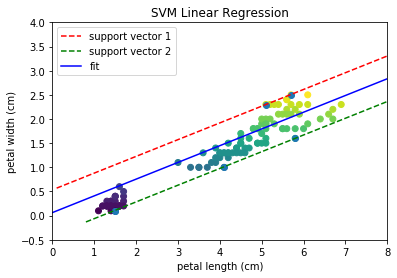

In [131]:
plt.scatter(X_train[:, 0], X_train[:, 1], c = svc_clf.predict(X_train))
plt.scatter(x = svc_clf.support_vectors_[:, 0], y = svc_clf.support_vectors_[:, 1])
plt.plot([upperMarginLowerX,upperMarginUpperX],[upperMarginLowery,upperMarginUppery],ls="--",c="r",
        label = "support vector 1")
plt.plot([lowerMarginLowerX,lowerMarginUpperX],[lowerMarginLowery,lowerMarginUppery],ls="--",c="g",
        label = "support vector 2")
plt.plot([lowerMarginLowerX-d/2,lowerMarginUpperX-d/2+1],[lowerMarginLowery,lowerMarginUppery+slope],ls="-",c="b",
        label = "fit")
plt.xlim(0,8)
plt.ylim(-0.5,4)
plt.xlabel(data["feature_names"][2])
plt.ylabel(data["feature_names"][3])
plt.legend()
plt.title('SVM Linear Regression')
plt.savefig("svmRegLinearSep.png",bbox_inches="tight")
plt.show()